In [1]:
# 데이터 불러오기
import pandas as pd

churn_df = pd.read_csv('data/churn_data.csv')
churn_df = churn_df.drop(columns = ['number'])
churn_df

,system_id,grade_sect_cd,mbr_sex_cd,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label,re_purch
0,87ee0282-ece5-4491-bb07-be93854750ac,G011,M,31.0,247.0,952000.0,0.59,670.48,673.0,306.0,1377.0,0,False
1,8817ada1-b7ad-4713-b041-ee180540cb87,G011,M,31.0,238.0,1071000.0,0.00,0.00,0.0,0.0,0.0,0,False
2,884cddf4-bda5-4d81-960c-b9a4892645f0,G011,F,31.0,92.0,436000.0,0.70,400.44,1067.0,468.0,6289.0,0,False
3,8a58832b-592b-4b33-b05e-0e11422d73d5,G011,M,31.0,370.0,1417000.0,0.81,914.47,840.0,212.0,1714.0,0,False
4,8af8f516-a9f0-4b6a-a27f-fc77ba51f708,G011,M,1.0,1.0,109000.0,0.00,0.00,0.0,0.0,0.0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,3d97d2c6-50dd-4c12-9fee-01578d691b0d,G016,F,31.0,613.0,1180000.0,0.69,262.33,41.0,26.0,590.0,0,True
59996,41258431-f36d-46e7-a0d4-43f98edafd21,G016,M,31.0,62.0,178000.0,0.69,164.69,429.0,187.0,812.0,0,True
59997,4157bf9d-92ea-4656-a2f6-9ac53ced8328,G016,F,31.0,217.0,872000.0,0.43,353.55,853.0,417.0,3064.0,0,False
59998,416c8ba3-330b-45fc-aae8-91b548c28b3d,G016,M,31.0,312.0,869000.0,0.68,172.41,930.0,234.0,1092.0,0,True


In [2]:
# 결측치 확인 -> 없음
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   system_id                 60000 non-null  object 
 1   grade_sect_cd             60000 non-null  object 
 2   mbr_sex_cd                60000 non-null  object 
 3   tmon_pchrg_lrn_dcnt       60000 non-null  float64
 4   acmlt_pchrg_lrn_dcnt      60000 non-null  float64
 5   acmlt_bilclct_amt         60000 non-null  float64
 6   correct_rate_avg          60000 non-null  float64
 7   learning_time_avg         60000 non-null  float64
 8   media_action_cnt_sum      60000 non-null  float64
 9   non_video_viewed_cnt_sum  60000 non-null  float64
 10  get_mm_point_sum          60000 non-null  float64
 11  label                     60000 non-null  int64  
 12  re_purch                  60000 non-null  bool   
dtypes: bool(1), float64(8), int64(1), object(3)
memory usage: 5.6

정규분포 확인 및 박스 플롯으로 이상치 확인 후 IQR로 제거

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

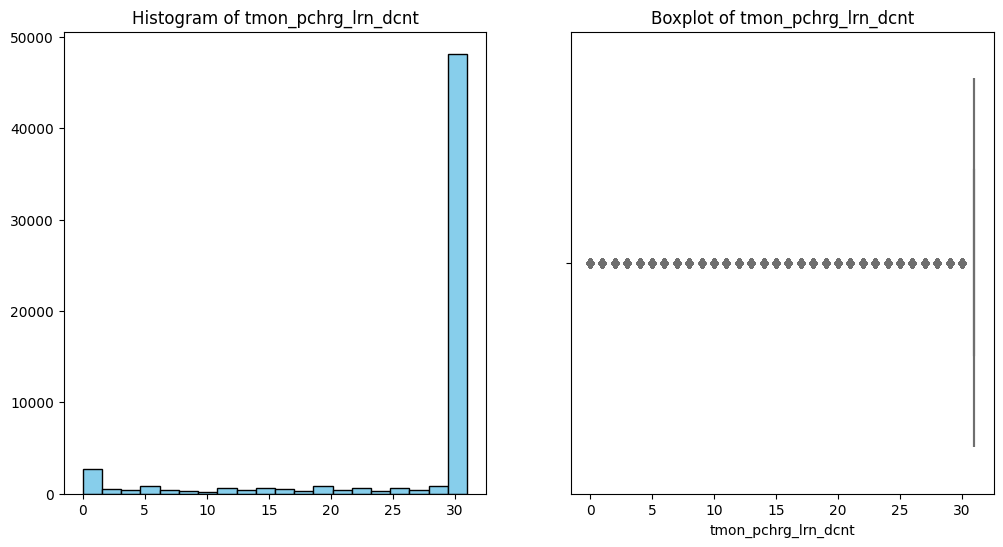

In [4]:
# 히스토그램 그리기
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(churn_df['tmon_pchrg_lrn_dcnt'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of tmon_pchrg_lrn_dcnt')

# 박스 플롯 그리기
plt.subplot(1, 2, 2)
sns.boxplot(x=churn_df['tmon_pchrg_lrn_dcnt'], color='skyblue')
plt.title('Boxplot of tmon_pchrg_lrn_dcnt')

plt.show()

In [5]:
# 딩월 유료 학습일 수 컬럼으로 0일부터 31일까지 범위를 넘어가지 않아 이상치가 없다고 판단
churn_df['tmon_pchrg_lrn_dcnt'].describe()

count    60000.000000
mean        27.335317
std          8.584667
min          0.000000
25%         31.000000
50%         31.000000
75%         31.000000
max         31.000000
Name: tmon_pchrg_lrn_dcnt, dtype: float64

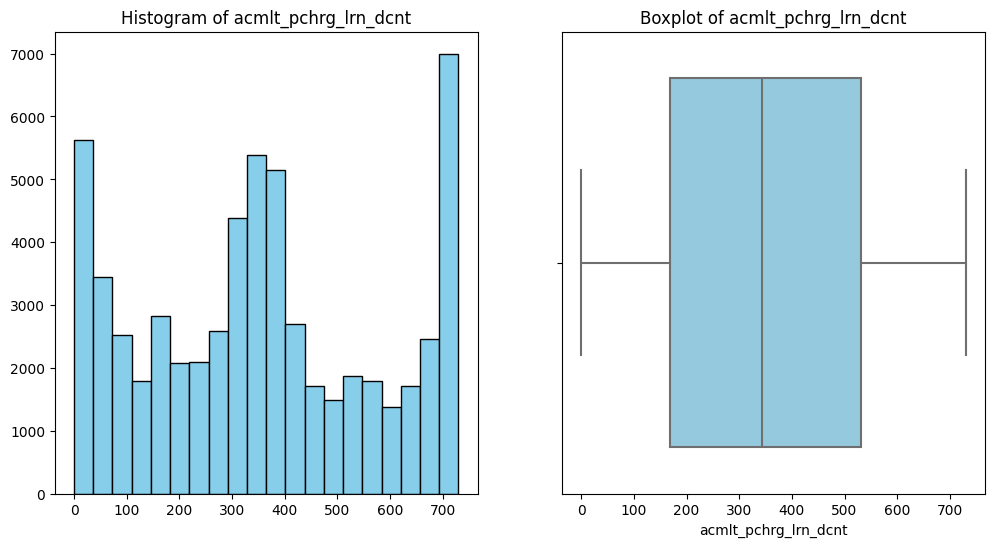

In [6]:
# acmlt_pchrg_lrn_dcnt 컬럼은 박스플롯을 통해 이상치가 없다고 판단
# 히스토그램 그리기
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(churn_df['acmlt_pchrg_lrn_dcnt'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of acmlt_pchrg_lrn_dcnt')

# 박스 플롯 그리기
plt.subplot(1, 2, 2)
sns.boxplot(x=churn_df['acmlt_pchrg_lrn_dcnt'], color='skyblue')
plt.title('Boxplot of acmlt_pchrg_lrn_dcnt')

plt.show()

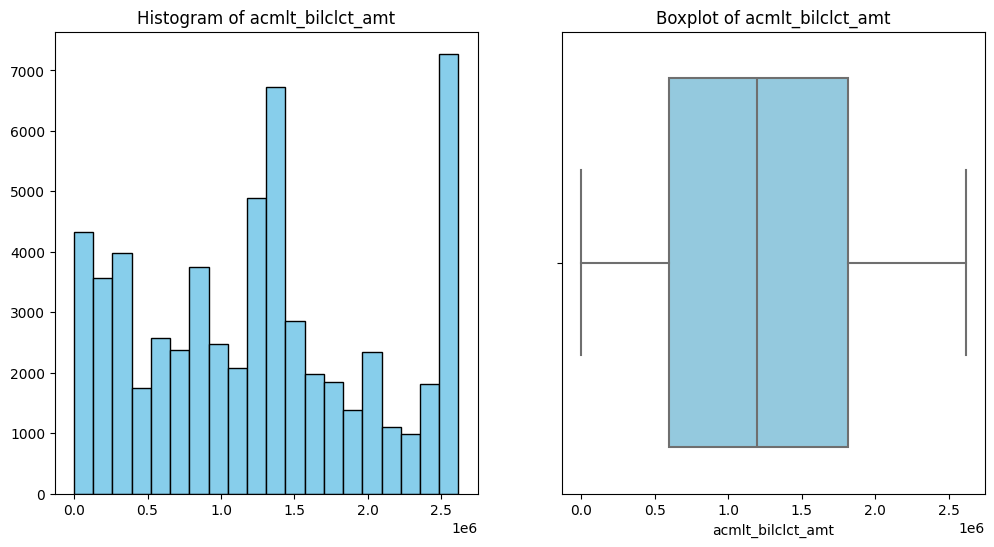

In [7]:
# acmlt_bilclct_amt 컬럼은 박스플롯을 통해 이상치가 없다고 판단
# 히스토그램 그리기
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(churn_df['acmlt_bilclct_amt'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of acmlt_bilclct_amt')

# 박스 플롯 그리기
plt.subplot(1, 2, 2)
sns.boxplot(x=churn_df['acmlt_bilclct_amt'], color='skyblue')
plt.title('Boxplot of acmlt_bilclct_amt')

plt.show()

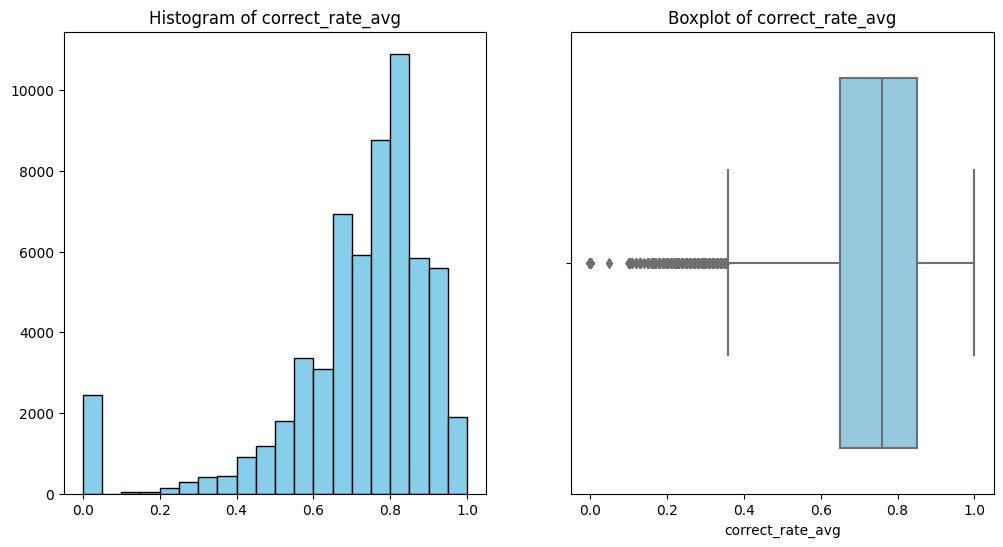

In [8]:
# 히스토그램 그리기
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(churn_df['correct_rate_avg'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of correct_rate_avg')

# 박스 플롯 그리기
plt.subplot(1, 2, 2)
sns.boxplot(x=churn_df['correct_rate_avg'], color='skyblue')
plt.title('Boxplot of correct_rate_avg')

plt.show()

In [9]:
# 정답률은 0 ~ 1 사이의 값으로 존재함으로 이상치가 없다고 판단
churn_df['correct_rate_avg'].describe()

count    60000.000000
mean         0.717041
std          0.203345
min          0.000000
25%          0.650000
50%          0.760000
75%          0.850000
max          1.000000
Name: correct_rate_avg, dtype: float64

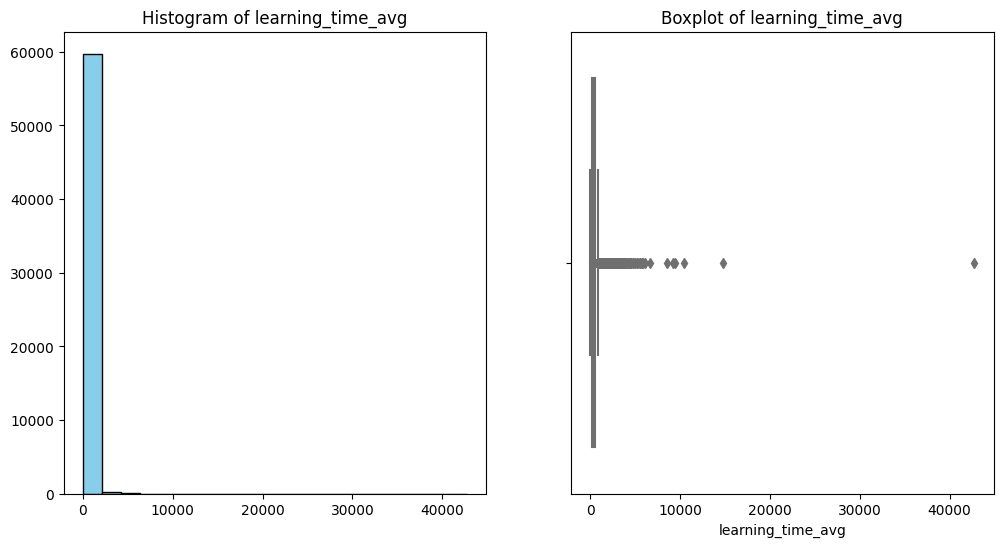

In [10]:
# 히스토그램 그리기
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(churn_df['learning_time_avg'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of learning_time_avg')

# 박스 플롯 그리기
plt.subplot(1, 2, 2)
sns.boxplot(x=churn_df['learning_time_avg'], color='skyblue')
plt.title('Boxplot of learning_time_avg')

plt.show()

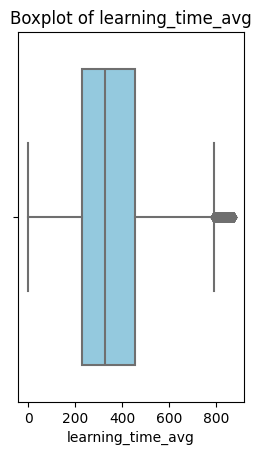

In [11]:
# 박스플롯 판단 후 이상치 제거
# 'acmlt_pchrg_lrn_dcnt' 열에 대한 IQR 계산
Q1 = churn_df['learning_time_avg'].quantile(0.25)
Q3 = churn_df['learning_time_avg'].quantile(0.75)
IQR = Q3 - Q1

# IQR을 사용하여 이상치의 경계 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치를 제거한 데이터프레임 생성
filtered_df = churn_df[(churn_df['learning_time_avg'] >= lower_bound) & (churn_df['learning_time_avg'] <= upper_bound)]

# 박스 플롯 그리기
plt.subplot(1, 2, 2)
sns.boxplot(x=filtered_df['learning_time_avg'], color='skyblue')
plt.title('Boxplot of learning_time_avg')

plt.show()

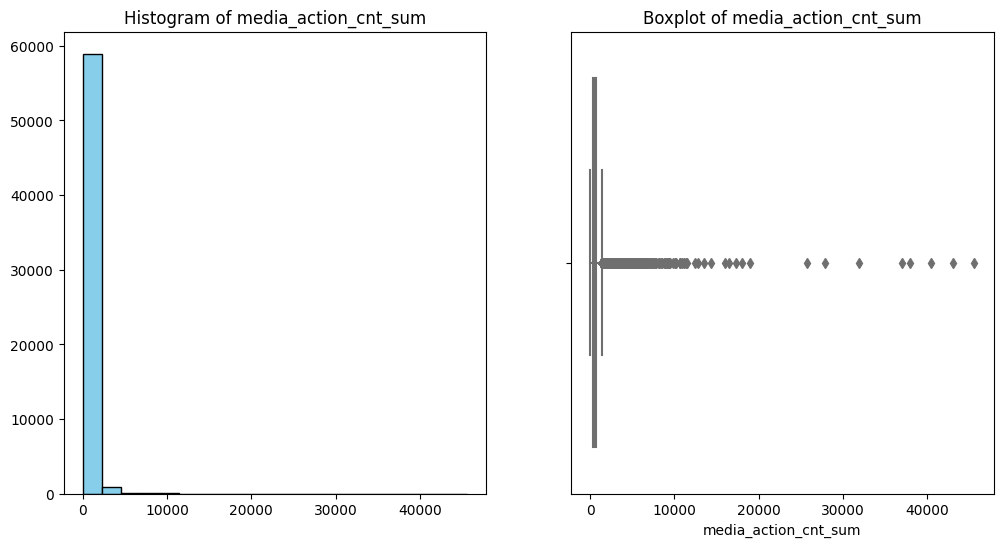

In [12]:
# 히스토그램 그리기
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(churn_df['media_action_cnt_sum'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of media_action_cnt_sum')

# 박스 플롯 그리기
plt.subplot(1, 2, 2)
sns.boxplot(x=churn_df['media_action_cnt_sum'], color='skyblue')
plt.title('Boxplot of media_action_cnt_sum')

plt.show()

                                  system_id grade_sect_cd mbr_sex_cd  \
0      87ee0282-ece5-4491-bb07-be93854750ac          G011          M   
1      8817ada1-b7ad-4713-b041-ee180540cb87          G011          M   
2      884cddf4-bda5-4d81-960c-b9a4892645f0          G011          F   
4      8af8f516-a9f0-4b6a-a27f-fc77ba51f708          G011          M   
5      8f6aff91-6a13-4d4d-a70c-3de1e22024c3          G011          M   
...                                     ...           ...        ...   
59995  3d97d2c6-50dd-4c12-9fee-01578d691b0d          G016          F   
59996  41258431-f36d-46e7-a0d4-43f98edafd21          G016          M   
59997  4157bf9d-92ea-4656-a2f6-9ac53ced8328          G016          F   
59998  416c8ba3-330b-45fc-aae8-91b548c28b3d          G016          M   
59999  423b5121-b5e9-4a2c-ab53-2c06c21baf62          G016          M   

       tmon_pchrg_lrn_dcnt  acmlt_pchrg_lrn_dcnt  acmlt_bilclct_amt  \
0                     31.0                 247.0           95200

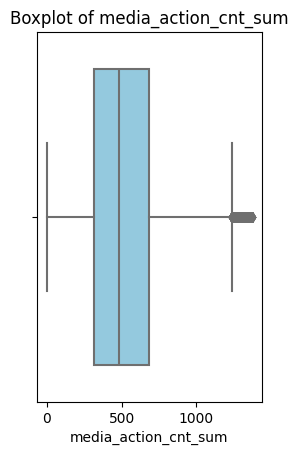

In [13]:
# 박스플롯 판단 후 이상치 제거
# 'acmlt_pchrg_lrn_dcnt' 열에 대한 IQR 계산
Q1 = churn_df['media_action_cnt_sum'].quantile(0.25)
Q3 = churn_df['media_action_cnt_sum'].quantile(0.75)
IQR = Q3 - Q1

# IQR을 사용하여 이상치의 경계 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치를 제거한 데이터프레임 생성
filtered_df = filtered_df[(filtered_df['media_action_cnt_sum'] >= lower_bound) & (filtered_df['media_action_cnt_sum'] <= upper_bound)]

# 이상치를 제거한 데이터프레임 출력
print(filtered_df)

# 박스 플롯 그리기
plt.subplot(1, 2, 2)
sns.boxplot(x=filtered_df['media_action_cnt_sum'], color='skyblue')
plt.title('Boxplot of media_action_cnt_sum')

plt.show()

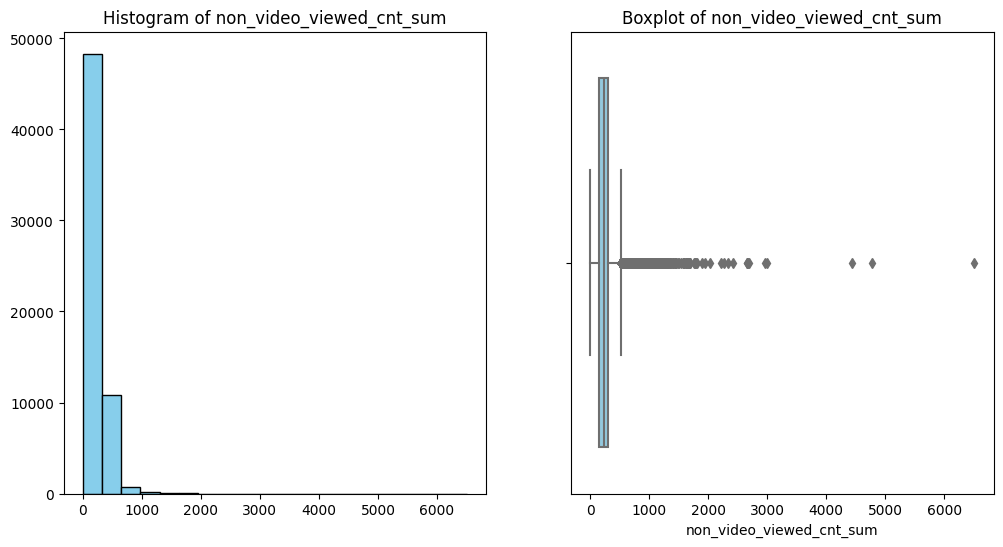

In [14]:
# 히스토그램 그리기
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(churn_df['non_video_viewed_cnt_sum'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of non_video_viewed_cnt_sum')

# 박스 플롯 그리기
plt.subplot(1, 2, 2)
sns.boxplot(x=churn_df['non_video_viewed_cnt_sum'], color='skyblue')
plt.title('Boxplot of non_video_viewed_cnt_sum')

plt.show()

                                  system_id grade_sect_cd mbr_sex_cd  \
0      87ee0282-ece5-4491-bb07-be93854750ac          G011          M   
1      8817ada1-b7ad-4713-b041-ee180540cb87          G011          M   
2      884cddf4-bda5-4d81-960c-b9a4892645f0          G011          F   
4      8af8f516-a9f0-4b6a-a27f-fc77ba51f708          G011          M   
5      8f6aff91-6a13-4d4d-a70c-3de1e22024c3          G011          M   
...                                     ...           ...        ...   
59995  3d97d2c6-50dd-4c12-9fee-01578d691b0d          G016          F   
59996  41258431-f36d-46e7-a0d4-43f98edafd21          G016          M   
59997  4157bf9d-92ea-4656-a2f6-9ac53ced8328          G016          F   
59998  416c8ba3-330b-45fc-aae8-91b548c28b3d          G016          M   
59999  423b5121-b5e9-4a2c-ab53-2c06c21baf62          G016          M   

       tmon_pchrg_lrn_dcnt  acmlt_pchrg_lrn_dcnt  acmlt_bilclct_amt  \
0                     31.0                 247.0           95200

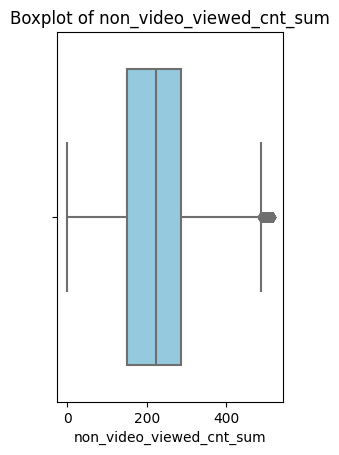

In [15]:
# 박스플롯 판단 후 이상치 제거
# 'acmlt_pchrg_lrn_dcnt' 열에 대한 IQR 계산
Q1 = churn_df['non_video_viewed_cnt_sum'].quantile(0.25)
Q3 = churn_df['non_video_viewed_cnt_sum'].quantile(0.75)
IQR = Q3 - Q1

# IQR을 사용하여 이상치의 경계 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치를 제거한 데이터프레임 생성
filtered_df = filtered_df[(filtered_df['non_video_viewed_cnt_sum'] >= lower_bound) & (filtered_df['non_video_viewed_cnt_sum'] <= upper_bound)]

# 이상치를 제거한 데이터프레임 출력
print(filtered_df)

# 박스 플롯 그리기
plt.subplot(1, 2, 2)
sns.boxplot(x=filtered_df['non_video_viewed_cnt_sum'], color='skyblue')
plt.title('Boxplot of non_video_viewed_cnt_sum')

plt.show()

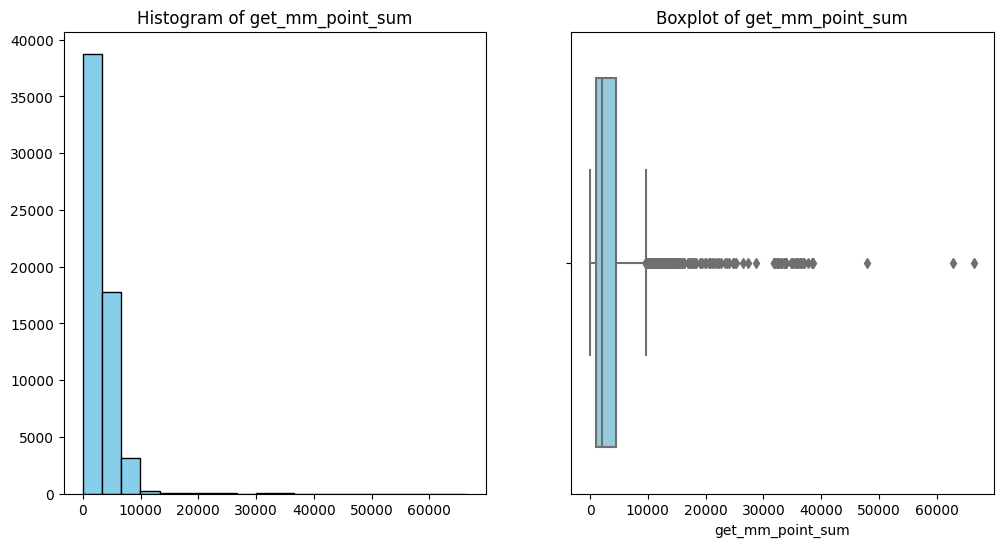

In [16]:
# 히스토그램 그리기
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(churn_df['get_mm_point_sum'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of get_mm_point_sum')

# 박스 플롯 그리기
plt.subplot(1, 2, 2)
sns.boxplot(x=churn_df['get_mm_point_sum'], color='skyblue')
plt.title('Boxplot of get_mm_point_sum')

plt.show()

                                  system_id grade_sect_cd mbr_sex_cd  \
0      87ee0282-ece5-4491-bb07-be93854750ac          G011          M   
1      8817ada1-b7ad-4713-b041-ee180540cb87          G011          M   
2      884cddf4-bda5-4d81-960c-b9a4892645f0          G011          F   
4      8af8f516-a9f0-4b6a-a27f-fc77ba51f708          G011          M   
5      8f6aff91-6a13-4d4d-a70c-3de1e22024c3          G011          M   
...                                     ...           ...        ...   
59995  3d97d2c6-50dd-4c12-9fee-01578d691b0d          G016          F   
59996  41258431-f36d-46e7-a0d4-43f98edafd21          G016          M   
59997  4157bf9d-92ea-4656-a2f6-9ac53ced8328          G016          F   
59998  416c8ba3-330b-45fc-aae8-91b548c28b3d          G016          M   
59999  423b5121-b5e9-4a2c-ab53-2c06c21baf62          G016          M   

       tmon_pchrg_lrn_dcnt  acmlt_pchrg_lrn_dcnt  acmlt_bilclct_amt  \
0                     31.0                 247.0           95200

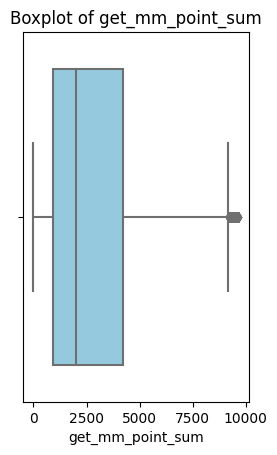

In [17]:
# 박스플롯 판단 후 이상치 제거
# 'acmlt_pchrg_lrn_dcnt' 열에 대한 IQR 계산
Q1 = churn_df['get_mm_point_sum'].quantile(0.25)
Q3 = churn_df['get_mm_point_sum'].quantile(0.75)
IQR = Q3 - Q1

# IQR을 사용하여 이상치의 경계 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치를 제거한 데이터프레임 생성
filtered_df = filtered_df[(filtered_df['get_mm_point_sum'] >= lower_bound) & (filtered_df['get_mm_point_sum'] <= upper_bound)]

# 이상치를 제거한 데이터프레임 출력
print(filtered_df)

# 박스 플롯 그리기
plt.subplot(1, 2, 2)
sns.boxplot(x=filtered_df['get_mm_point_sum'], color='skyblue')
plt.title('Boxplot of get_mm_point_sum')

plt.show()

In [18]:
# 1, 2, 3, 4, 5, 6 으로 치환 -> 'grade' 컬럼 구성
grade_dict = {'G011': 1, 'G012': 2, 'G013': 3, 'G014': 4, 'G015': 5, 'G016': 6}
filtered_df['grade'] = filtered_df['grade_sect_cd'].apply(lambda x : grade_dict[x])
filtered_df['grade']

0        1
1        1
2        1
4        1
5        1
        ..
59995    6
59996    6
59997    6
59998    6
59999    6
Name: grade, Length: 52018, dtype: int64

In [19]:
filtered_df

,system_id,grade_sect_cd,mbr_sex_cd,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label,re_purch,grade
0,87ee0282-ece5-4491-bb07-be93854750ac,G011,M,31.0,247.0,952000.0,0.59,670.48,673.0,306.0,1377.0,0,False,1
1,8817ada1-b7ad-4713-b041-ee180540cb87,G011,M,31.0,238.0,1071000.0,0.00,0.00,0.0,0.0,0.0,0,False,1
2,884cddf4-bda5-4d81-960c-b9a4892645f0,G011,F,31.0,92.0,436000.0,0.70,400.44,1067.0,468.0,6289.0,0,False,1
4,8af8f516-a9f0-4b6a-a27f-fc77ba51f708,G011,M,1.0,1.0,109000.0,0.00,0.00,0.0,0.0,0.0,0,False,1
5,8f6aff91-6a13-4d4d-a70c-3de1e22024c3,G011,M,31.0,322.0,1199000.0,0.67,444.50,8.0,6.0,29.0,0,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,3d97d2c6-50dd-4c12-9fee-01578d691b0d,G016,F,31.0,613.0,1180000.0,0.69,262.33,41.0,26.0,590.0,0,True,6
59996,41258431-f36d-46e7-a0d4-43f98edafd21,G016,M,31.0,62.0,178000.0,0.69,164.69,429.0,187.0,812.0,0,True,6
59997,4157bf9d-92ea-4656-a2f6-9ac53ced8328,G016,F,31.0,217.0,872000.0,0.43,353.55,853.0,417.0,3064.0,0,False,6
59998,416c8ba3-330b-45fc-aae8-91b548c28b3d,G016,M,31.0,312.0,869000.0,0.68,172.41,930.0,234.0,1092.0,0,True,6


- 프로젝트: 이탈 예측 모델 개발
    - 모델의 전반적인 컨셉 -> 전학년 별 이탈 예측, 학년 별 이탈 예측, 성별에 따른 이탈 예측, 재구매 이력에 따른 이탈 예측 등
    - 활용 데이터 설명
    - 예측 모델(linear, logistic, DCT, Xgboost, LGBM 등등)
    - 성능 지표를 통한 결과 설명

In [54]:
!pip install numpy scipy scikit-learn

In [120]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 533.9 kB/s eta 0:00:0000:0100:01


In [20]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from lightgbm import plot_importance
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from sklearn.metrics import confusion_matrix

In [59]:
# 필요 컬럼만 가져오기 (X : 학습 데이터, y: 레이블)
X1 = filtered_df[['grade',
             'tmon_pchrg_lrn_dcnt',
             'acmlt_pchrg_lrn_dcnt',
             'acmlt_bilclct_amt',
             'correct_rate_avg',
             'learning_time_avg',
             'media_action_cnt_sum',
             'non_video_viewed_cnt_sum',
             ]]
y = filtered_df['label']

In [60]:
X_train1, X_test1, y_train, y_test = train_test_split(X1, y, test_size = 0.2, random_state=42)

print("[Train] 전체 : {}, 이탈 {}, 미이탈 : {}".format(len(X_train1), y_train[y_train == 1].shape[0],  y_train[y_train == 0].shape[0]))
print("[Test] 전체 : {}, 이탈 {}, 미이탈 : {}".format(len(X_test1), y_test[y_test == 1].shape[0],  y_test[y_test == 0].shape[0]))

[Train] 전체 : 41614, 이탈 710, 미이탈 : 40904
[Test] 전체 : 10404, 이탈 185, 미이탈 : 10219


전학년 별 이탈 예측

In [61]:
# LGBM
lgbm_model1 = LGBMClassifier(random_state = 0)
lgbm_model1.fit(X=X_train1, y = y_train)

[LightGBM] [Info] Number of positive: 710, number of negative: 40904
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1397
[LightGBM] [Info] Number of data points in the train set: 41614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.017062 -> initscore=-4.053718
[LightGBM] [Info] Start training from score -4.053718


LGBMClassifier(random_state=0)

In [62]:
y_pred1_lgbm = lgbm_model1.predict(X_test1)
print("[predict] 전체 : {}, 이탈 : {}, 미이탈 : {}".format(len(X_test1), np.count_nonzero(y_pred1_lgbm== 1), np.count_nonzero(y_pred1_lgbm== 0)))

[predict] 전체 : 10404, 이탈 : 175, 미이탈 : 10229


In [63]:
accuracy_score(y_test, y_pred1_lgbm)

0.9944252210688197

In [64]:
precision_recall_fscore_support(y_test, y_pred1_lgbm, average='binary')

(0.8628571428571429, 0.8162162162162162, 0.8388888888888889, None)

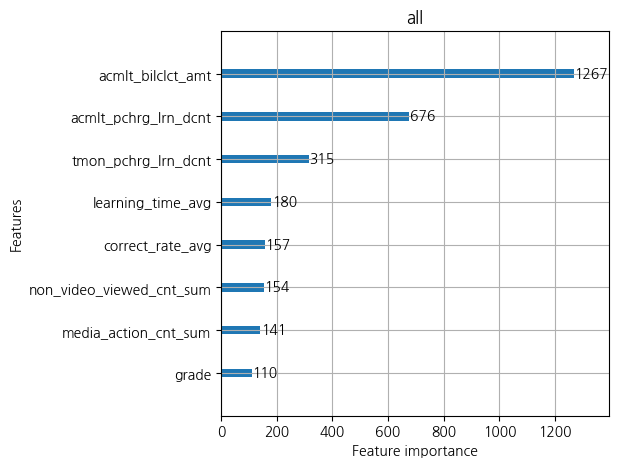

In [65]:
    fig, ax = plt.subplots(figsize = (5,5))
    plot_importance(lgbm_model1, ax = ax)
    plt.title('all')
    plt.show()
    print()

학년 별 이탈 예측

[1학년]
[Train] 전체 : 6658, 이탈 125, 미이탈 : 6533
[Test] 전체 : 1665, 이탈 40, 미이탈 : 1625
[predict] 이탈 : 27, 미이탈 : 1638
Accuracy :  0.990990990990991
precision, recall, f1 score (0.9629629629629629, 0.65, 0.7761194029850746, None)


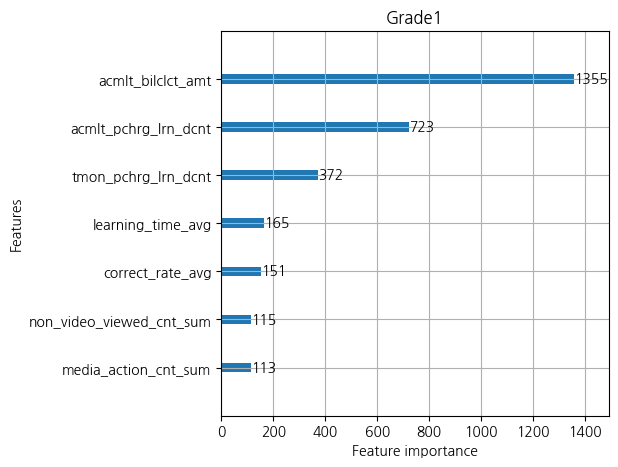


[2학년]
[Train] 전체 : 6957, 이탈 91, 미이탈 : 6866
[Test] 전체 : 1740, 이탈 25, 미이탈 : 1715
[predict] 이탈 : 22, 미이탈 : 1718
Accuracy :  0.9925287356321839
precision, recall, f1 score (0.7727272727272727, 0.68, 0.7234042553191491, None)


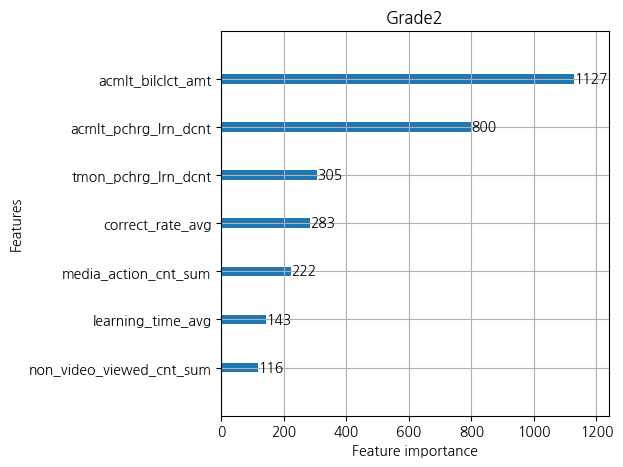


[3학년]
[Train] 전체 : 6939, 이탈 79, 미이탈 : 6860
[Test] 전체 : 1735, 이탈 27, 미이탈 : 1708
[predict] 이탈 : 19, 미이탈 : 1716
Accuracy :  0.9907780979827089
precision, recall, f1 score (0.7894736842105263, 0.5555555555555556, 0.6521739130434783, None)


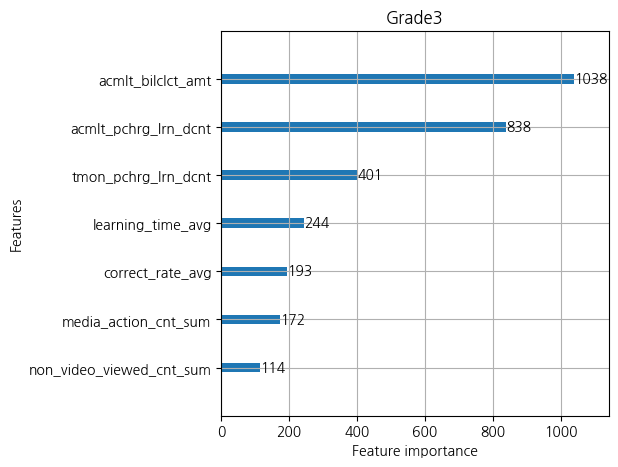


[4학년]
[Train] 전체 : 6984, 이탈 108, 미이탈 : 6876
[Test] 전체 : 1746, 이탈 37, 미이탈 : 1709
[predict] 이탈 : 23, 미이탈 : 1723
Accuracy :  0.9908361970217641
precision, recall, f1 score (0.9565217391304348, 0.5945945945945946, 0.7333333333333334, None)


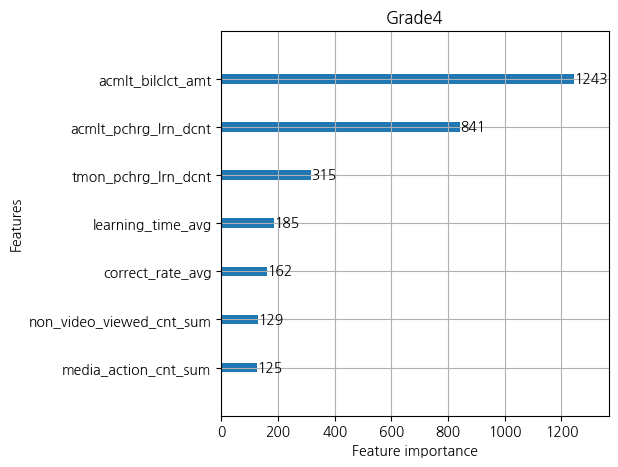


[5학년]
[Train] 전체 : 7026, 이탈 125, 미이탈 : 6901
[Test] 전체 : 1757, 이탈 26, 미이탈 : 1731
[predict] 이탈 : 15, 미이탈 : 1742
Accuracy :  0.9914627205463858
precision, recall, f1 score (0.8666666666666667, 0.5, 0.6341463414634146, None)


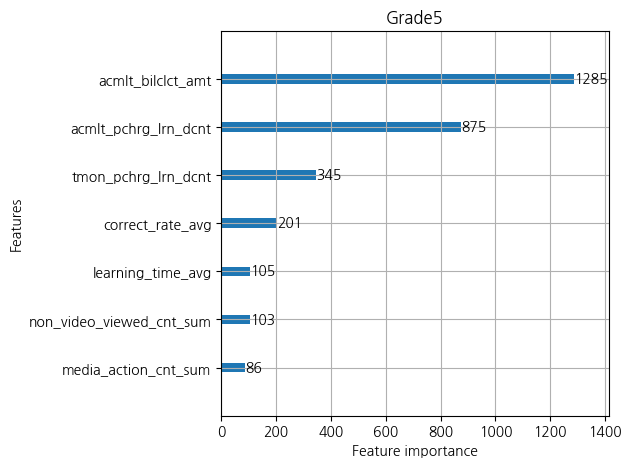


[6학년]
[Train] 전체 : 7048, 이탈 169, 미이탈 : 6879
[Test] 전체 : 1763, 이탈 43, 미이탈 : 1720
[predict] 이탈 : 35, 미이탈 : 1728
Accuracy :  0.9886557005104935
precision, recall, f1 score (0.8285714285714286, 0.6744186046511628, 0.7435897435897435, None)


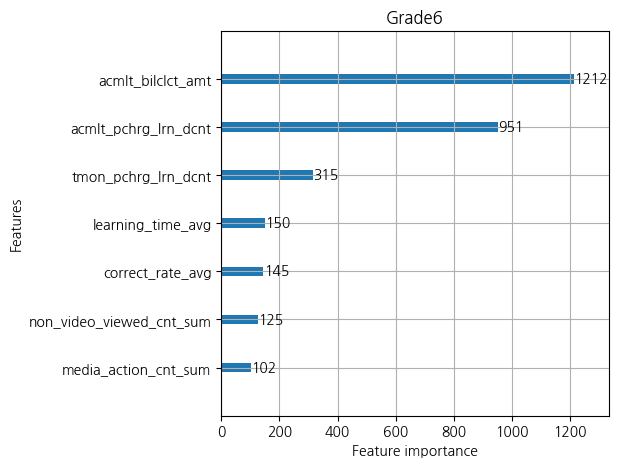

In [40]:
grade_dfs = {}

for grade in range(1, 7):
    grade_df = grade_dfs[f'grade_{grade}_df'] = filtered_df[filtered_df['grade'] == grade]
    
    X2 = grade_df[[
             'tmon_pchrg_lrn_dcnt',
             'acmlt_pchrg_lrn_dcnt',
             'acmlt_bilclct_amt',
             'correct_rate_avg',
             'learning_time_avg',
             'media_action_cnt_sum',
             'non_video_viewed_cnt_sum',
             ]]
    y = grade_df['label']

    #데이터 분리
    X_train2, X_test2, y_train, y_test = train_test_split(X2, y, test_size = 0.2, random_state=42)
    
    # lgbm 모델 학습
    lgbm_model2 = LGBMClassifier(random_state = 0, verbose = -1)
    lgbm_model2.fit(X_train2, y_train)
    y_pred2_lgbm = lgbm_model2.predict(X_test2)

    # 결과
    print("[{}학년]".format(grade))
    print("[Train] 전체 : {}, 이탈 {}, 미이탈 : {}".format(len(X_train2), y_train[y_train == 1].shape[0],  y_train[y_train == 0].shape[0]))
    print("[Test] 전체 : {}, 이탈 {}, 미이탈 : {}".format(len(X_test2), y_test[y_test == 1].shape[0],  y_test[y_test == 0].shape[0]))
    print("[predict] 이탈 : {}, 미이탈 : {}".format(np.count_nonzero(y_pred2_lgbm== 1), np.count_nonzero(y_pred2_lgbm== 0)))
    print("Accuracy : ", accuracy_score(y_test, y_pred2_lgbm))
    print("precision, recall, f1 score" , precision_recall_fscore_support(y_test, y_pred2_lgbm, average='binary'))
    fig, ax = plt.subplots(figsize = (5,5))
    plot_importance(lgbm_model2, ax = ax)
    plt.title('Grade{}'.format(grade))
    plt.show()
    print()

성별에 따른 이탈예측

[M 성별]
[Train] 전체 : 22679, 이탈 425, 미이탈 : 22254
[Test] 전체 : 5670, 이탈 93, 미이탈 : 5577
[Predict] 이탈 : 100, 미이탈 : 5570
Accuracy :  0.9931216931216931
Precision, Recall, F1 Score:  (0.77, 0.8279569892473119, 0.7979274611398963, None)


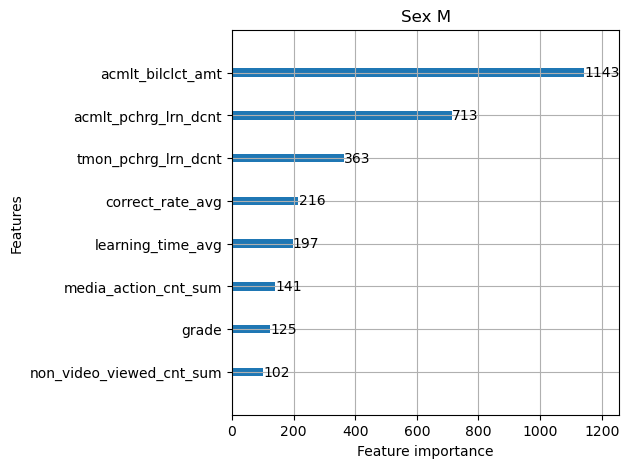


[F 성별]
[Train] 전체 : 17728, 이탈 290, 미이탈 : 17438
[Test] 전체 : 4432, 이탈 65, 미이탈 : 4367
[Predict] 이탈 : 53, 미이탈 : 4379
Accuracy :  0.9941335740072202
Precision, Recall, F1 Score:  (0.8679245283018868, 0.7076923076923077, 0.7796610169491526, None)


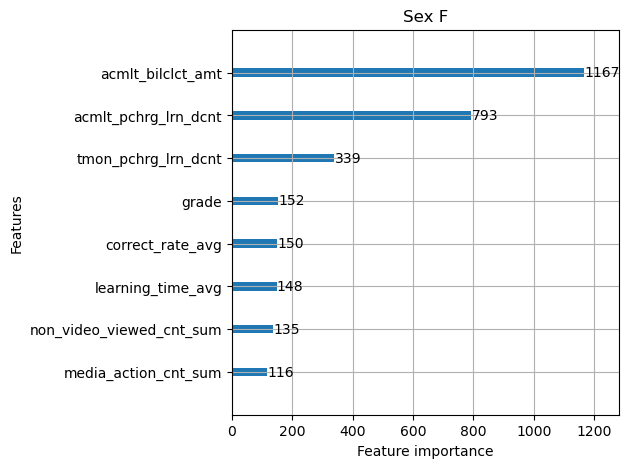


[X 성별]
[Train] 전체 : 1207, 이탈 16, 미이탈 : 1191
[Test] 전체 : 302, 이탈 6, 미이탈 : 296
[Predict] 이탈 : 5, 미이탈 : 297
Accuracy :  0.9900662251655629
Precision, Recall, F1 Score:  (0.8, 0.6666666666666666, 0.7272727272727272, None)


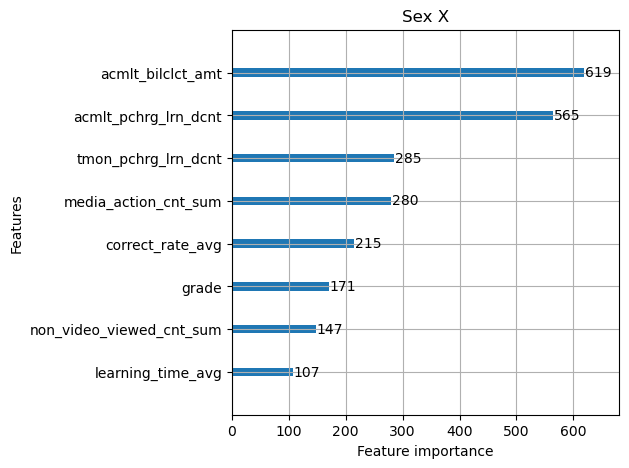

In [69]:
sex_dfs = {}

# 성별로 데이터를 나누어 모델 학습 및 평가
for sex in ['M', 'F', 'X']:
    sex_df = sex_dfs[f'sex_{sex}_df'] = filtered_df[filtered_df['mbr_sex_cd'] == sex]
    
    X3 = sex_df[[
             'grade',
             'tmon_pchrg_lrn_dcnt',
             'acmlt_pchrg_lrn_dcnt',
             'acmlt_bilclct_amt',
             'correct_rate_avg',
             'learning_time_avg',
             'media_action_cnt_sum',
             'non_video_viewed_cnt_sum',
             ]]
    y3 = sex_df['label']

    # 데이터 분리
    X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)
    
    # lgbm 모델 학습
    lgbm_model3 = LGBMClassifier(random_state=0, verbose=-1)
    lgbm_model3.fit(X_train3, y_train3)
    y_pred3_lgbm = lgbm_model3.predict(X_test3)

    # 결과
    print("[{} 성별]".format(sex))
    print("[Train] 전체 : {}, 이탈 {}, 미이탈 : {}".format(len(X_train3), sum(y_train3 == 1), sum(y_train3 == 0)))
    print("[Test] 전체 : {}, 이탈 {}, 미이탈 : {}".format(len(X_test3), sum(y_test3 == 1), sum(y_test3 == 0)))
    print("[Predict] 이탈 : {}, 미이탈 : {}".format(np.count_nonzero(y_pred3_lgbm == 1), np.count_nonzero(y_pred3_lgbm == 0)))
    print("Accuracy : ", accuracy_score(y_test3, y_pred3_lgbm))
    print("Precision, Recall, F1 Score: ", precision_recall_fscore_support(y_test3, y_pred3_lgbm, average='binary'))
    fig, ax = plt.subplots(figsize=(5, 5))
    plot_importance(lgbm_model3, ax=ax)
    plt.title('Sex {}'.format(sex))
    plt.show()
    print()

재구매 이력에 따른 이탈 예측

[Repurch True]
[Train] 전체 : 9201, 이탈 231, 미이탈 : 8970
[Test] 전체 : 2301, 이탈 55, 미이탈 : 2246
[Predict] 이탈 : 52, 미이탈 : 2249
Accuracy :  0.9952194697957409
Precision, Recall, F1 Score:  (0.9230769230769231, 0.8727272727272727, 0.897196261682243, None)


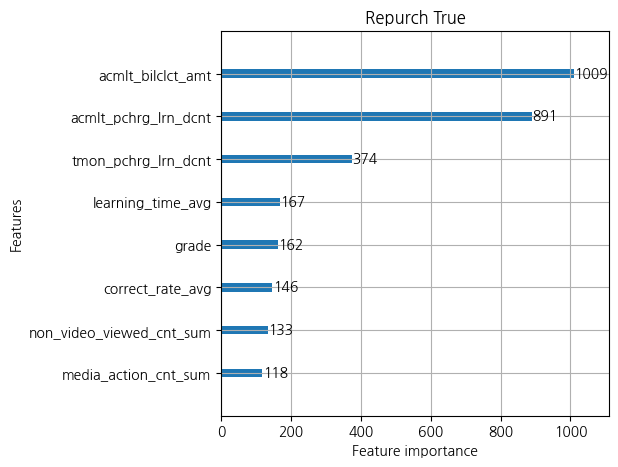


[Repurch False]
[Train] 전체 : 32412, 이탈 490, 미이탈 : 31922
[Test] 전체 : 8104, 이탈 119, 미이탈 : 7985
[Predict] 이탈 : 114, 미이탈 : 7990
Accuracy :  0.99642152023692
Precision, Recall, F1 Score:  (0.8947368421052632, 0.8571428571428571, 0.8755364806866952, None)


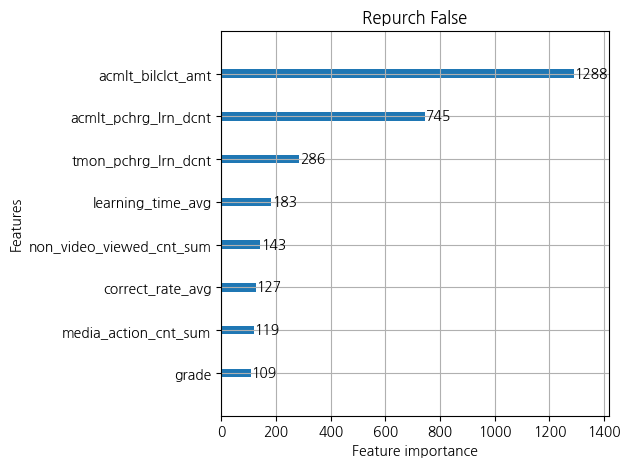

In [29]:
re_purch_dfs = {}

# 성별로 데이터를 나누어 모델 학습 및 평가
for repurch in [True, False]:
    re_purch_df = re_purch_dfs[f're_purch_{repurch}_df'] = filtered_df[filtered_df['re_purch'] == repurch]
    
    X4 = re_purch_df[[
             'grade',
             'tmon_pchrg_lrn_dcnt',
             'acmlt_pchrg_lrn_dcnt',
             'acmlt_bilclct_amt',
             'correct_rate_avg',
             'learning_time_avg',
             'media_action_cnt_sum',
             'non_video_viewed_cnt_sum',
             ]]
    y4 = re_purch_df['label']

    # 데이터 분리
    X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)
    
    # lgbm 모델 학습
    lgbm_model4 = LGBMClassifier(random_state=0, verbose=-1)
    lgbm_model4.fit(X_train4, y_train4)
    y_pred4_lgbm = lgbm_model4.predict(X_test4)

    # 결과
    print("[Repurch {}]".format(repurch))
    print("[Train] 전체 : {}, 이탈 {}, 미이탈 : {}".format(len(X_train4), sum(y_train4 == 1), sum(y_train4 == 0)))
    print("[Test] 전체 : {}, 이탈 {}, 미이탈 : {}".format(len(X_test4), sum(y_test4 == 1), sum(y_test4 == 0)))
    print("[Predict] 이탈 : {}, 미이탈 : {}".format(np.count_nonzero(y_pred4_lgbm == 1), np.count_nonzero(y_pred4_lgbm == 0)))
    print("Accuracy : ", accuracy_score(y_test4, y_pred4_lgbm))
    print("Precision, Recall, F1 Score: ", precision_recall_fscore_support(y_test4, y_pred4_lgbm, average='binary'))
    fig, ax = plt.subplots(figsize=(5, 5))
    plot_importance(lgbm_model4, ax=ax)
    plt.title('Repurch {}'.format(repurch))
    plt.show()
    print()

유료 학습일 수 에 따른 예측 모델

In [30]:
# 최댓값, 최소값이 많기 때문에 최댓값, 최솟값, 평균값 세 그룹으로 나누어서 모델 평가
filtered_df['tmon_pchrg_lrn_dcnt'].value_counts()

tmon_pchrg_lrn_dcnt
31.0    41086
0.0      2075
1.0       465
5.0       438
20.0      396
29.0      381
27.0      361
30.0      360
13.0      360
19.0      350
6.0       342
21.0      340
4.0       334
12.0      334
7.0       329
28.0      309
26.0      308
2.0       299
14.0      293
24.0      280
18.0      269
22.0      269
15.0      267
25.0      250
23.0      234
11.0      221
16.0      217
3.0       200
17.0      193
10.0      174
8.0       173
9.0       111
Name: count, dtype: int64

In [32]:
tmon_zero_df = filtered_df[filtered_df['tmon_pchrg_lrn_dcnt'] == 0]
tmon_31_df = filtered_df[filtered_df['tmon_pchrg_lrn_dcnt'] == 31]
tmon_other_df = filtered_df[(filtered_df['tmon_pchrg_lrn_dcnt'] != 0) & (filtered_df['tmon_pchrg_lrn_dcnt'] != 31)]

# 각 그룹에 대해 모델 학습 및 평가 수행
for group_name, group_df in [('tmon_zero', tmon_zero_df), ('tmon_31', tmon_31_df), ('tmon_other', tmon_other_df)]:
    
    X5 = group_df[['grade',
                        'tmon_pchrg_lrn_dcnt',
                        'acmlt_pchrg_lrn_dcnt',
                        'acmlt_bilclct_amt',
                        'correct_rate_avg',
                        'learning_time_avg',
                        'media_action_cnt_sum',
                        'non_video_viewed_cnt_sum']]
    y5 = group_df['label']

    # 데이터 분리
    X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.2, random_state=42)

    # lgbm 모델 학습
    lgbm_model5 = LGBMClassifier(random_state=0, verbose=-1)
    lgbm_model5.fit(X_train5, y_train5)
    y_pred5_lgbm = lgbm_model5.predict(X_test5)

    # 결과 출력
    print("[{}]".format(group_name))
    print("[Train] 전체 : {}, 이탈 {}, 미이탈 : {}".format(len(X_train5), sum(y_train5 == 1), sum(y_train5 == 0)))
    print("[Test] 전체 : {}, 이탈 {}, 미이탈 : {}".format(len(X_test5), sum(y_test5 == 1), sum(y_test5 == 0)))
    print("[Predict] 이탈 : {}, 미이탈 : {}".format(np.count_nonzero(y_pred5_lgbm == 1), np.count_nonzero(y_pred5_lgbm == 0)))
    print("Accuracy : ", accuracy_score(y_test5, y_pred5_lgbm))
    print("Precision, Recall, F1 Score: ", precision_recall_fscore_support(y_test5, y_pred5_lgbm, average='binary'))
    print()


[tmon_zero]
[Train] 전체 : 1660, 이탈 324, 미이탈 : 1336
[Test] 전체 : 415, 이탈 83, 미이탈 : 332
[Predict] 이탈 : 75, 미이탈 : 340
Accuracy :  0.946987951807229
Precision, Recall, F1 Score:  (0.9066666666666666, 0.8192771084337349, 0.8607594936708859, None)

[tmon_31]
[Train] 전체 : 32868, 이탈 0, 미이탈 : 32868
[Test] 전체 : 8218, 이탈 0, 미이탈 : 8218
[Predict] 이탈 : 0, 미이탈 : 8218
Accuracy :  1.0
Precision, Recall, F1 Score:  (0.0, 0.0, 0.0, None)



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[tmon_other]
[Train] 전체 : 7085, 이탈 399, 미이탈 : 6686
[Test] 전체 : 1772, 이탈 89, 미이탈 : 1683
[Predict] 이탈 : 80, 미이탈 : 1692
Accuracy :  0.9802483069977427
Precision, Recall, F1 Score:  (0.8375, 0.7528089887640449, 0.7928994082840237, None)



누적된 학습 일 수 ( 성숙도 )

In [33]:
filtered_df['acmlt_pchrg_lrn_dcnt'].describe()
# 20%씩 다섯 그룹으로 나누어서 모델 개발

count    52018.000000
mean       361.930870
std        225.367111
min          0.000000
25%        180.000000
50%        349.000000
75%        546.000000
max        730.000000
Name: acmlt_pchrg_lrn_dcnt, dtype: float64

In [80]:
# 그룹 나누기
# bins = filtered_df['acmlt_pchrg_lrn_dcnt'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1.0])
# filtered_df['acmlt_pchrg_lrn_dcnt_group'] = pd.cut(filtered_df['acmlt_pchrg_lrn_dcnt'], bins, labels=False)

# 예측 모델 개발
group_dfs = {}
for group in range(5):
    group_df = group_dfs[f'group_{group}_df'] = filtered_df[filtered_df['acmlt_pchrg_lrn_dcnt_group'] == group]
    max_value = group_df['acmlt_pchrg_lrn_dcnt'].max()
    min_value = group_df['acmlt_pchrg_lrn_dcnt'].min()
    print(f"Group {group} - Max: {max_value}, Min: {min_value}")
    print()
    
    X6 = group_df[[
        'grade',
        'tmon_pchrg_lrn_dcnt',
        'acmlt_pchrg_lrn_dcnt',
        'acmlt_bilclct_amt',
        'correct_rate_avg',
        'learning_time_avg',
        'media_action_cnt_sum',
        'non_video_viewed_cnt_sum',
    ]]
    y6 = group_df['label']

    # 데이터 분리
    X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.2, random_state=42)
    
    # LGBM 모델 학습
    lgbm_model6 = LGBMClassifier(random_state=0, verbose=-1)
    lgbm_model6.fit(X_train6, y_train6)
    y_pred6_lgbm = lgbm_model6.predict(X_test6)
    
     # 결과 출력
    print("[Group {}]".format(group))
    print("[Train] 전체 : {}, 이탈 {}, 미이탈 : {}".format(len(X_train6), sum(y_train6 == 1), sum(y_train6 == 0)))
    print("[Test] 전체 : {}, 이탈 {}, 미이탈 : {}".format(len(X_test6), sum(y_test6 == 1), sum(y_test6 == 0)))
    print("[Predict] 이탈 : {}, 미이탈 : {}".format(np.count_nonzero(y_pred6_lgbm == 1), np.count_nonzero(y_pred6_lgbm == 0)))
    print("Accuracy : ", accuracy_score(y_test6, y_pred6_lgbm))
    print("Precision, Recall, F1 Score: ", precision_recall_fscore_support(y_test6, y_pred6_lgbm, average='binary'))
#     fig, ax = plt.subplots(figsize=(5, 5))
#     plot_importance(lgbm_model6, ax=ax)
#     plt.title('Group {}'.format(group))
#     plt.show()
    print()


Group 0 - Max: 127.0, Min: 1.0

[Group 0]
[Train] 전체 : 8316, 이탈 212, 미이탈 : 8104
[Test] 전체 : 2080, 이탈 48, 미이탈 : 2032
[Predict] 이탈 : 43, 미이탈 : 2037
Accuracy :  0.9956730769230769
Precision, Recall, F1 Score:  (0.9534883720930233, 0.8541666666666666, 0.9010989010989011, None)

Group 1 - Max: 307.0, Min: 128.0

[Group 1]
[Train] 전체 : 8297, 이탈 180, 미이탈 : 8117
[Test] 전체 : 2075, 이탈 41, 미이탈 : 2034
[Predict] 이탈 : 35, 미이탈 : 2040
Accuracy :  0.9942168674698795
Precision, Recall, F1 Score:  (0.9142857142857143, 0.7804878048780488, 0.8421052631578947, None)

Group 2 - Max: 394.0, Min: 308.0

[Group 2]
[Train] 전체 : 8405, 이탈 103, 미이탈 : 8302
[Test] 전체 : 2102, 이탈 22, 미이탈 : 2080
[Predict] 이탈 : 16, 미이탈 : 2086
Accuracy :  0.9971455756422455
Precision, Recall, F1 Score:  (1.0, 0.7272727272727273, 0.8421052631578948, None)

Group 3 - Max: 611.0, Min: 395.0

[Group 3]
[Train] 전체 : 8272, 이탈 154, 미이탈 : 8118
[Test] 전체 : 2069, 이탈 30, 미이탈 : 2039
[Predict] 이탈 : 30, 미이탈 : 2039
Accuracy :  0.9942000966650556
Precisi

In [35]:
filtered_df[filtered_df['acmlt_pchrg_lrn_dcnt_group']==2.0].describe()

,tmon_pchrg_lrn_dcnt,acmlt_pchrg_lrn_dcnt,acmlt_bilclct_amt,correct_rate_avg,learning_time_avg,media_action_cnt_sum,non_video_viewed_cnt_sum,get_mm_point_sum,label,grade,acmlt_pchrg_lrn_dcnt_group
count,10507.000000,10507.000000,1.050700e+04,10507.000000,10507.000000,10507.000000,10507.000000,10507.000000,10507.000000,10507.000000,10507.0
mean,30.111354,351.201485,1.221830e+06,0.719411,368.468254,511.130104,221.223851,2747.206719,0.011897,3.280670,2.0
std,4.493726,24.881846,2.089024e+05,0.195205,184.741207,276.786990,103.359960,2079.156092,0.108427,1.756642,0.0
min,0.000000,308.000000,4.290000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.0
25%,31.000000,333.000000,1.079100e+06,0.650000,241.130000,339.000000,165.000000,1055.500000,0.000000,2.000000,2.0
50%,31.000000,349.000000,1.308000e+06,0.760000,341.860000,484.000000,225.000000,2137.000000,0.000000,3.000000,2.0
75%,31.000000,373.000000,1.417000e+06,0.840000,478.770000,666.000000,284.000000,4432.000000,0.000000,5.000000,2.0
max,31.000000,394.000000,2.616000e+06,1.000000,875.360000,1368.000000,517.000000,9488.000000,1.000000,6.000000,2.0


In [36]:
filtered_df['acmlt_pchrg_lrn_dcnt_group'].value_counts()

acmlt_pchrg_lrn_dcnt_group
2.0    10507
0.0    10396
1.0    10372
4.0    10356
3.0    10341
Name: count, dtype: int64

In [37]:
# 예측 모델 개발
group_dfs = {}
for group in range(5):
    group_df = group_dfs[f'group_{group}_df'] = filtered_df[filtered_df['acmlt_pchrg_lrn_dcnt_group'] == group]
    
    X6 = group_df[[
        'grade',
        'tmon_pchrg_lrn_dcnt',
        'acmlt_pchrg_lrn_dcnt',
        'acmlt_bilclct_amt',
        'correct_rate_avg',
        'learning_time_avg',
        'media_action_cnt_sum',
        'non_video_viewed_cnt_sum',
    ]]
    y6 = group_df['label']

    # 데이터 분리
    X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.2, random_state=42)
    
    # Random Forest 모델 학습
    rf_model6 = RandomForestClassifier(random_state=0)
    rf_model6.fit(X_train6, y_train6)
    y_pred6_rf = rf_model6.predict(X_test6)

    # 결과 출력
    print("[Group {}]".format(group))
    print("[Train] 전체 : {}, 이탈 {}, 미이탈 : {}".format(len(X_train6), sum(y_train6 == 1), sum(y_train6 == 0)))
    print("[Test] 전체 : {}, 이탈 {}, 미이탈 : {}".format(len(X_test6), sum(y_test6 == 1), sum(y_test6 == 0)))
    print("[Predict] 이탈 : {}, 미이탈 : {}".format(np.count_nonzero(y_pred6_rf == 1), np.count_nonzero(y_pred6_rf == 0)))
    print("Accuracy : ", accuracy_score(y_test6, y_pred6_rf))
    print("Precision, Recall, F1 Score: ", precision_recall_fscore_support(y_test6, y_pred6_rf, average='binary'))
    print()


[Group 0]
[Train] 전체 : 8316, 이탈 212, 미이탈 : 8104
[Test] 전체 : 2080, 이탈 48, 미이탈 : 2032
[Predict] 이탈 : 41, 미이탈 : 2039
Accuracy :  0.9947115384615385
Precision, Recall, F1 Score:  (0.9512195121951219, 0.8125, 0.8764044943820225, None)

[Group 1]
[Train] 전체 : 8297, 이탈 180, 미이탈 : 8117
[Test] 전체 : 2075, 이탈 41, 미이탈 : 2034
[Predict] 이탈 : 26, 미이탈 : 2049
Accuracy :  0.9898795180722891
Precision, Recall, F1 Score:  (0.8846153846153846, 0.5609756097560976, 0.6865671641791045, None)

[Group 2]
[Train] 전체 : 8405, 이탈 103, 미이탈 : 8302
[Test] 전체 : 2102, 이탈 22, 미이탈 : 2080
[Predict] 이탈 : 15, 미이탈 : 2087
Accuracy :  0.99476688867745
Precision, Recall, F1 Score:  (0.8666666666666667, 0.5909090909090909, 0.7027027027027029, None)

[Group 3]
[Train] 전체 : 8272, 이탈 154, 미이탈 : 8118
[Test] 전체 : 2069, 이탈 30, 미이탈 : 2039
[Predict] 이탈 : 27, 미이탈 : 2042
Accuracy :  0.9908168197196714
Precision, Recall, F1 Score:  (0.7037037037037037, 0.6333333333333333, 0.6666666666666667, None)

[Group 4]
[Train] 전체 : 8284, 이탈 77, 미이탈 : 

구매 누적 수금액에 따른 이탈 예측

Group 0 - Max: 436000.0, Min: 20778.0



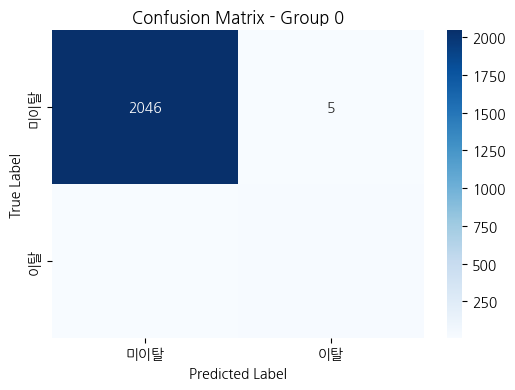

[Group 0]
[Train] 전체 : 8288, 이탈 85, 미이탈 : 8203
[Test] 전체 : 2072, 이탈 21, 미이탈 : 2051
[Predict] 이탈 : 21, 미이탈 : 2051
Accuracy :  0.9951737451737451
Precision, Recall, F1 Score:  (0.7619047619047619, 0.7619047619047619, 0.7619047619047619, None)


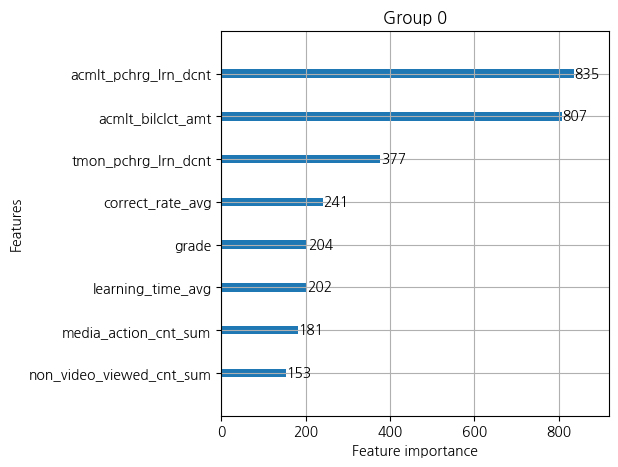


Group 1 - Max: 1027000.0, Min: 436339.0



<Figure size 700x500 with 0 Axes>

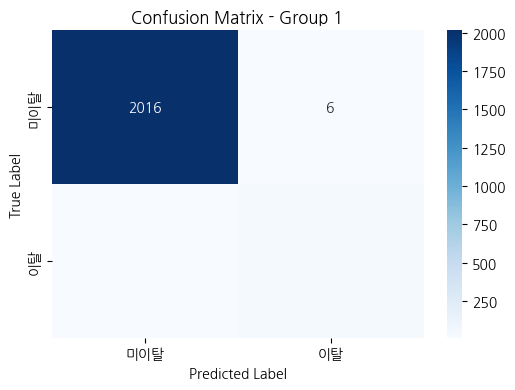

[Group 1]
[Train] 전체 : 8258, 이탈 142, 미이탈 : 8116
[Test] 전체 : 2065, 이탈 43, 미이탈 : 2022
[Predict] 이탈 : 44, 미이탈 : 2021
Accuracy :  0.9946731234866828
Precision, Recall, F1 Score:  (0.8636363636363636, 0.8837209302325582, 0.8735632183908046, None)


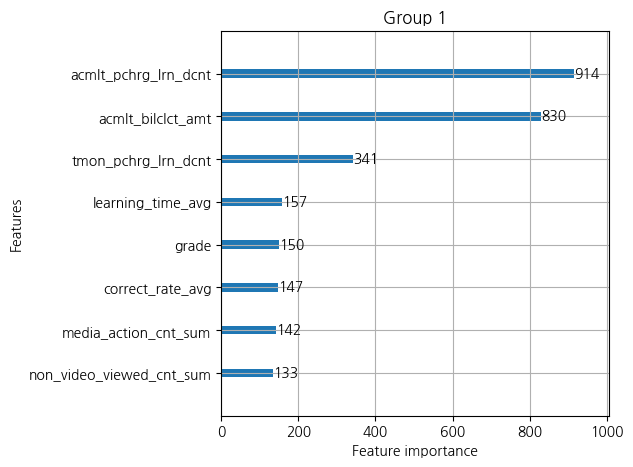


Group 2 - Max: 1417000.0, Min: 1028515.0



<Figure size 700x500 with 0 Axes>

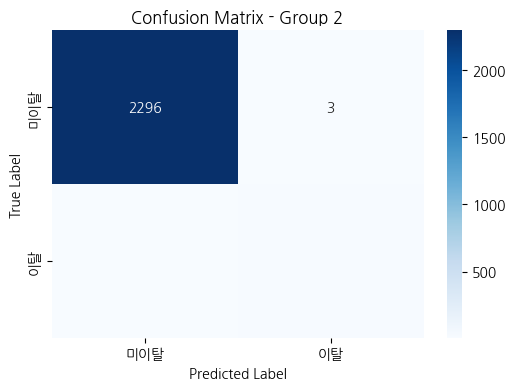

[Group 2]
[Train] 전체 : 9262, 이탈 86, 미이탈 : 9176
[Test] 전체 : 2316, 이탈 17, 미이탈 : 2299
[Predict] 이탈 : 18, 미이탈 : 2298
Accuracy :  0.9978411053540587
Precision, Recall, F1 Score:  (0.8333333333333334, 0.8823529411764706, 0.8571428571428571, None)


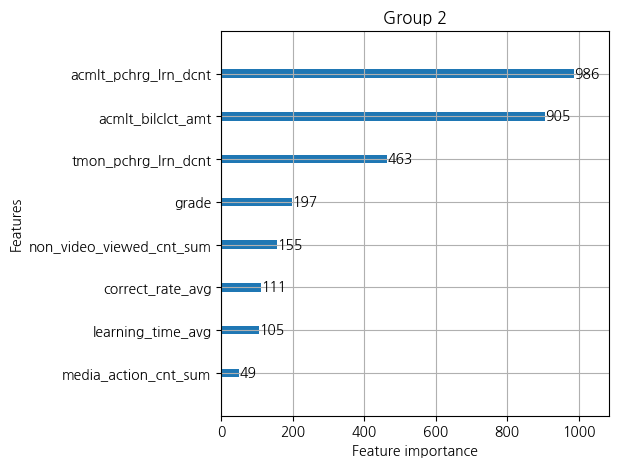


Group 3 - Max: 2071000.0, Min: 1420701.0



<Figure size 700x500 with 0 Axes>

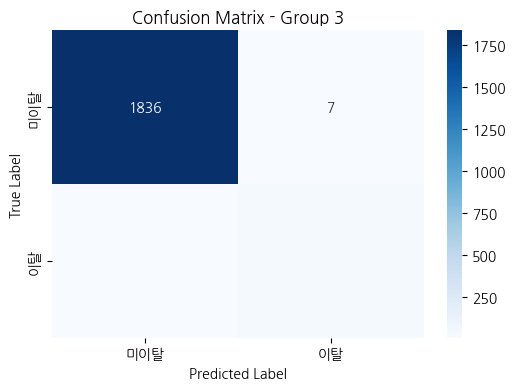

[Group 3]
[Train] 전체 : 7578, 이탈 183, 미이탈 : 7395
[Test] 전체 : 1895, 이탈 52, 미이탈 : 1843
[Predict] 이탈 : 47, 미이탈 : 1848
Accuracy :  0.9899736147757255
Precision, Recall, F1 Score:  (0.851063829787234, 0.7692307692307693, 0.8080808080808081, None)


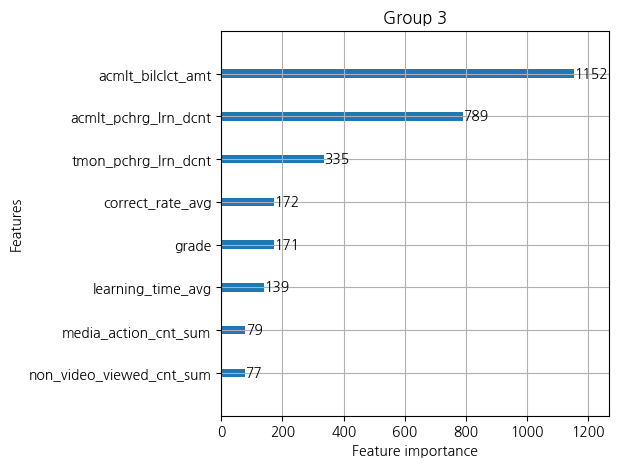


Group 4 - Max: 2616000.0, Min: 2073895.0



<Figure size 700x500 with 0 Axes>

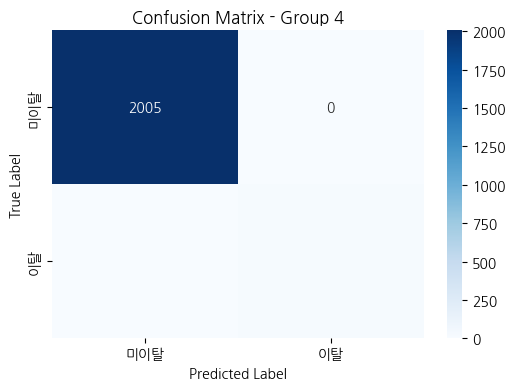

[Group 4]
[Train] 전체 : 8095, 이탈 82, 미이탈 : 8013
[Test] 전체 : 2024, 이탈 19, 미이탈 : 2005
[Predict] 이탈 : 18, 미이탈 : 2006
Accuracy :  0.9995059288537549
Precision, Recall, F1 Score:  (1.0, 0.9473684210526315, 0.972972972972973, None)


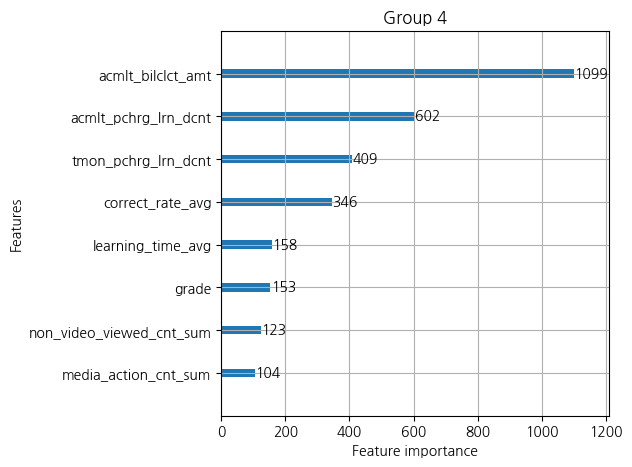

<Figure size 700x500 with 0 Axes>

In [92]:
# 그룹 나누기
bins = filtered_df['acmlt_bilclct_amt'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1.0])
filtered_df['acmlt_bilclct_amt_group'] = pd.cut(filtered_df['acmlt_bilclct_amt'], bins, labels=False)

# 예측 모델 개발
group_dfs = {}
for group in range(5):
    group_df = group_dfs[f'group_{group}_df'] = filtered_df[filtered_df['acmlt_bilclct_amt_group'] == group]
    max_value = group_df['acmlt_bilclct_amt'].max()
    min_value = group_df['acmlt_bilclct_amt'].min()
    print(f"Group {group} - Max: {max_value}, Min: {min_value}")
    print()
    
    X7 = group_df[[
        'grade',
        'tmon_pchrg_lrn_dcnt',
        'acmlt_pchrg_lrn_dcnt',
        'acmlt_bilclct_amt',
        'correct_rate_avg',
        'learning_time_avg',
        'media_action_cnt_sum',
        'non_video_viewed_cnt_sum',
    ]]
    y7 = group_df['label']

    # 데이터 분리
    X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, test_size=0.2, random_state=42)
    
    # LGBM 모델 학습
    lgbm_model7 = LGBMClassifier(random_state=0, verbose=-1)
    lgbm_model7.fit(X_train7, y_train7)
    y_pred7_lgbm = lgbm_model7.predict(X_test7)
    cmtx = confusion_matrix(y_test7, y_pred7_lgbm)
    
    # 결과 출력
    print("[Group {}]".format(group))
    print("[Train] 전체 : {}, 이탈 {}, 미이탈 : {}".format(len(X_train7), sum(y_train7 == 1), sum(y_train7 == 0)))
    print("[Test] 전체 : {}, 이탈 {}, 미이탈 : {}".format(len(X_test7), sum(y_test7 == 1), sum(y_test7 == 0)))
    print("[Predict] 이탈 : {}, 미이탈 : {}".format(np.count_nonzero(y_pred7_lgbm == 1), np.count_nonzero(y_pred7_lgbm == 0)))
    print("Accuracy : ", accuracy_score(y_test7, y_pred7_lgbm))
    print("Precision, Recall, F1 Score: ", precision_recall_fscore_support(y_test7, y_pred7_lgbm, average='binary'))
    fig, ax = plt.subplots(figsize=(5, 5))
    plot_importance(lgbm_model7, ax=ax)
    plt.title('Group {}'.format(group))
    plt.show()
    plt.figure(figsize=(7,5))
    print()



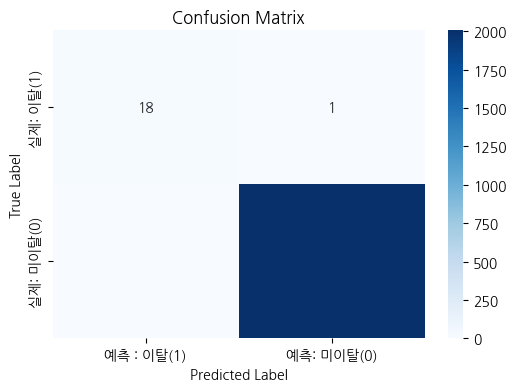

Confusion Matrix - Group 4 (LGBM):
[0 0 0 ... 0 0 0]

Precision: 1.00000
Recall: 0.94737
F1 Score: 0.97297


In [94]:
cmtx = pd.DataFrame(
    confusion_matrix(y_test7, y_pred7_lgbm, labels = [1,0]),
    index = ['실제: 이탈(1)','실제: 미이탈(0)'],
    columns = ['예측 : 이탈(1)', '예측: 미이탈(0)']
    )
cmtx

# 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(cmtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix')
plt.show()
    
# 혼동 행렬 수치 출력
print("Confusion Matrix - Group 4 (LGBM):")
print(y_pred7_lgbm)

# 정밀도, 재현율, F1 점수 계산 및 출력
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test7, y_pred7_lgbm, average='binary')
print("\nPrecision: {:.5f}".format(precision))
print("Recall: {:.5f}".format(recall))
print("F1 Score: {:.5f}".format(f1_score))

In [90]:
# 그룹 나누기
bins = filtered_df['acmlt_bilclct_amt'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1.0])
filtered_df['acmlt_bilclct_amt_group'] = pd.cut(filtered_df['acmlt_bilclct_amt'], bins, labels=False)

# 예측 모델 개발
group_dfs = {}
for group in range(5):
    group_df = group_dfs[f'group_{group}_df'] = filtered_df[filtered_df['acmlt_bilclct_amt_group'] == group]
    
    X7 = group_df[[
        'grade',
        'tmon_pchrg_lrn_dcnt',
        'acmlt_pchrg_lrn_dcnt',
        'acmlt_bilclct_amt',
        'correct_rate_avg',
        'learning_time_avg',
        'media_action_cnt_sum',
        'non_video_viewed_cnt_sum',
    ]]
    y7 = group_df['label']

    # 데이터 분리
    X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, test_size=0.2, random_state=42)
    
    # Random Forest 모델 학습
    rf_model7 = RandomForestClassifier(random_state=0)
    rf_model7.fit(X_train7, y_train7)
    y_pred7_rf = rf_model7.predict(X_test7)

    # 결과 출력
    print("[Group {}]".format(group))
    print("[Train] 전체 : {}, 이탈 {}, 미이탈 : {}".format(len(X_train7), sum(y_train7 == 1), sum(y_train7 == 0)))
    print("[Test] 전체 : {}, 이탈 {}, 미이탈 : {}".format(len(X_test7), sum(y_test7 == 1), sum(y_test7 == 0)))
    print("[Predict] 이탈 : {}, 미이탈 : {}".format(np.count_nonzero(y_pred7_rf == 1), np.count_nonzero(y_pred7_rf == 0)))
    print("Accuracy : ", accuracy_score(y_test7, y_pred7_rf))
    print("Precision, Recall, F1 Score: ", precision_recall_fscore_support(y_test7, y_pred7_rf, average='binary'))
    print()


[Group 0]
[Train] 전체 : 8288, 이탈 85, 미이탈 : 8203
[Test] 전체 : 2072, 이탈 21, 미이탈 : 2051
[Predict] 이탈 : 16, 미이탈 : 2056
Accuracy :  0.9956563706563707
Precision, Recall, F1 Score:  (0.875, 0.6666666666666666, 0.7567567567567567, None)

[Group 1]
[Train] 전체 : 8258, 이탈 142, 미이탈 : 8116
[Test] 전체 : 2065, 이탈 43, 미이탈 : 2022
[Predict] 이탈 : 30, 미이탈 : 2035
Accuracy :  0.9907990314769975
Precision, Recall, F1 Score:  (0.9, 0.627906976744186, 0.7397260273972602, None)

[Group 2]
[Train] 전체 : 9262, 이탈 86, 미이탈 : 9176
[Test] 전체 : 2316, 이탈 17, 미이탈 : 2299
[Predict] 이탈 : 12, 미이탈 : 2304
Accuracy :  0.9969775474956822
Precision, Recall, F1 Score:  (0.9166666666666666, 0.6470588235294118, 0.7586206896551724, None)

[Group 3]
[Train] 전체 : 7578, 이탈 183, 미이탈 : 7395
[Test] 전체 : 1895, 이탈 52, 미이탈 : 1843
[Predict] 이탈 : 32, 미이탈 : 1863
Accuracy :  0.9810026385224274
Precision, Recall, F1 Score:  (0.75, 0.46153846153846156, 0.5714285714285714, None)

[Group 4]
[Train] 전체 : 8095, 이탈 82, 미이탈 : 8013
[Test] 전체 : 2024, 이탈 19, 

,예측 : 이탈(1),예측: 미이탈(0)
실제: 이탈(1),8,2
실제: 미이탈(0),3,2059
